In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PyFWI.wave_propagation as wave
import PyFWI.acquisition as acq
import PyFWI.seiplot as splt
import PyFWI.model_dataset as md
import PyFWI.fwi_tools as fwi
import PyFWI.processing as process

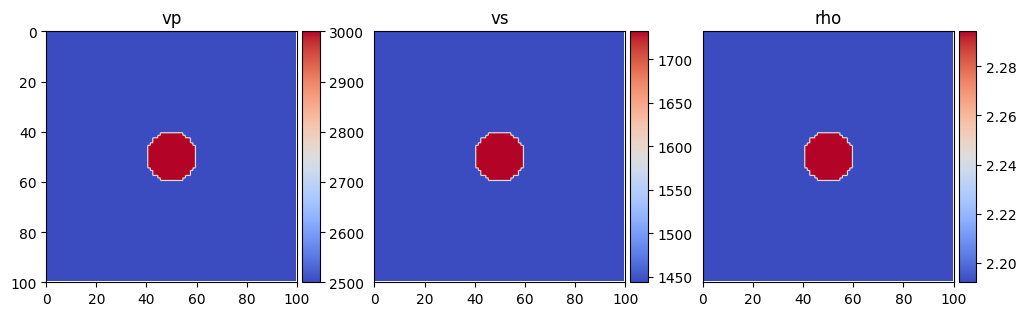

In [2]:
Model = md.ModelGenerator('louboutin')
model = Model()

im = splt.earth_model(model, cmap='coolwarm')

In [3]:
model_shape = model[[*model][0]].shape

inpa = {
    'ns': 1,  # Number of sources
    'sdo': 4,  # Order of FD
    'fdom': 15,  # Central frequency of source
    'dh': 7,  # Spatial sampling rate
    'dt': 0.004,  # Temporal sampling rate
    'acq_type': 1,  # Type of acquisition (0: crosswell, 1: surface, 2: both)
    't': 0.8,  # Length of operation
    'npml': 20,  # Number of PML
    'pmlR': 1e-5,  # Coefficient for PML (No need to change)
    'pml_dir': 2,  # type of boundary layer
    'device': 0, # The device to run the program. Usually 0: CPU 1: GPU
}

seisout = 0 # Type of output 0: Pressure

inpa['rec_dis'] =  1 * inpa['dh']  # Define the receivers' distance

In [4]:
offsetx = inpa['dh'] * model_shape[1]
depth = inpa['dh'] * model_shape[0]

src_loc, rec_loc = acq.surface_seismic(inpa['ns'], inpa['rec_dis'], offsetx, inpa['dh'], inpa['sdo'])
src_loc[:, 1] -= 5 * inpa['dh']

# Create the source
src = acq.Source(src_loc, inpa['dh'], inpa['dt'])
src.Ricker(inpa['fdom'])

In [5]:
# Create the wave object
W = wave.WavePropagator(inpa, src, rec_loc, model_shape, components=seisout, chpr=20)

# Call the forward modelling
d_obs = W.forward_modeling(model, show=False)  # show=True can show the propagation of the wave

RuntimeError: not all provided choices were used by create_some_context. (left over: '0')